In [1]:
import utils
import model

/Users/lohith/miniconda3/envs/torch/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/lohith/miniconda3/envs/torch/lib/python3.8/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [2]:
from torch.utils.data import DataLoader
from torch.optim import Adam

import torch

path_pairs = utils.get_file_paths("./LargerChunks/hazy", "./LargerChunks/clear")



In [3]:
TEST = utils.HeyZee(path_pairs)
TEST_LOADER = DataLoader(TEST, batch_size=1)

In [4]:
TheHayZee = model.MASK()

TheHayZee.load_state_dict(torch.load('./weights/weights/model_8.pth', map_location=torch.device("cpu")))


<All keys matched successfully>

In [5]:
TheHayZee.eval()  # Set the model to evaluation mode

with torch.no_grad():  # Disable gradient calculation
    for i, (haze, clear) in enumerate(TEST_LOADER):
        I0, I1, I2, I3 = haze
        O0, O1, O2, O3 = clear

        out = TheHayZee(I0, I1, I2, I3)

        break


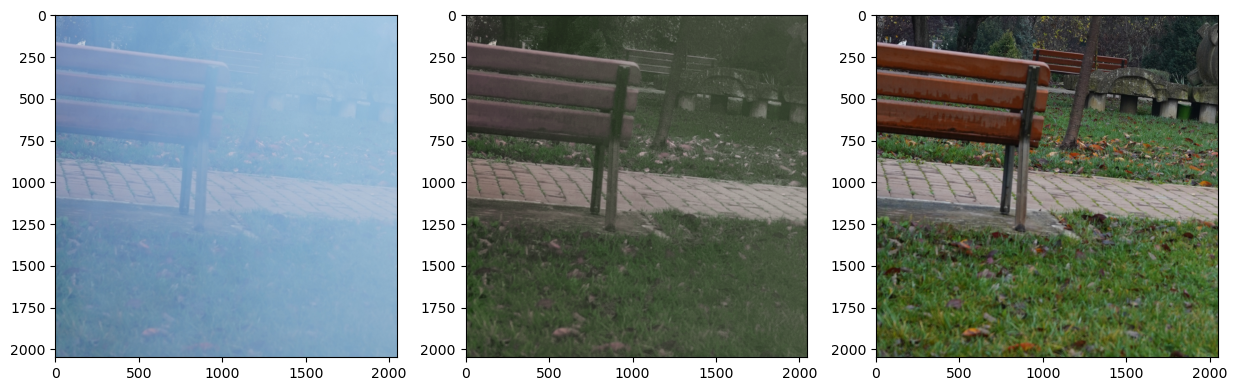

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,20))

plt.subplot(1,3,1)
plt.imshow(I0[0].permute(1,2,0))

plt.subplot(1,3,2)
plt.imshow(out[0][0].permute(1,2,0))

plt.subplot(1,3,3)
plt.imshow(O0[0].permute(1,2,0))

In [10]:
out[0][0].size()

torch.Size([3, 2048, 2048])

In [18]:
import numpy as np

def scale_to_norm(im):
    MIN = np.min(im.permute(1,2,0).numpy())
    MAX = np.max(im.permute(1,2,0).numpy())

    return np.array(255 * (im.permute(1,2,0).numpy() - MIN)/(MAX - MIN), dtype = np.int64)


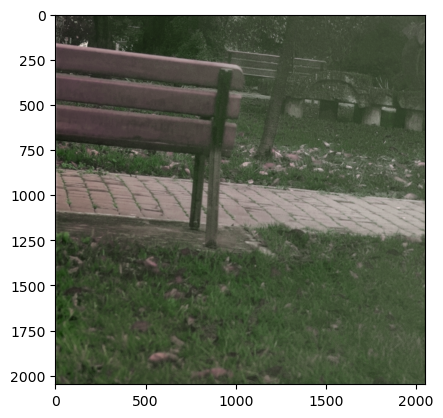